In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


In [94]:

#Multiclass Classification
df=pd.read_csv("OrthopedicPatients3Classes.csv")
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [95]:
# Before Applying KNN, we need to first drop any feature that has negative values

df=df.drop("degree_spondylolisthesis",axis=1,inplace=False)

In [106]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,Hernia


In [97]:
X=df.loc[:,df.columns !="class"].values


Y=df[["class"]].values

# Normalization of features to make sure each feature is contributing equally
X_data=(X-np.min(X))/(np.max(X)-np.min(X))

Y=Y.reshape((310,))







In [98]:
# train test split

X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y,test_size=0.2,random_state=1)

#lets start with 3 neighbors intitially 
knn_clf=KNeighborsClassifier(n_neighbors=3)



# Since KNN already has built in multiclass labeling,we dont need to use strategies such as One vs All
# or One vs One, We can directly fit the model and use the predict function




In [99]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred=knn_clf.predict(X_test)

In [101]:
y_pred

array(['Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Hernia', 'Normal', 'Hernia', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Normal', 'Normal', 'Hernia', 'Spondylolisthesis', 'Hernia',
       'Hernia', 'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Normal', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Normal', 'Normal', 'Hernia', 'Spondylolisthesis', 'Normal',
       'Hernia', 'Normal', 'Hernia', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',

In [102]:
knn_clf.score(X_test,Y_test)

0.5967741935483871

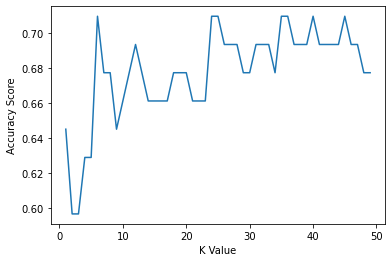

In [103]:
# now this was the accuracy score for when k=3, lets see the accuracy when k is higher


accuracy_scores=[]

for i in range(1,50):
  knn_clf_new=KNeighborsClassifier(n_neighbors=i) 
  knn_clf_new.fit(X_train,Y_train)
  accuracy_scores.append(knn_clf_new.score(X_test,Y_test))
plt.plot(range(1,50),accuracy_scores)
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.show()
 


In [104]:
# We can see from the above plot that the optimum k value is 6


# Now lets perform cross validation to improve our accuracy

cross_val_score(knn_clf,X_train,Y_train,cv=3,scoring="accuracy")

# the accuracy is improved but not by much when k=6




array([0.74698795, 0.71084337, 0.69512195])

In [105]:
#now lets check the confusion matrix 

confusion_matrix(Y_test,y_pred)



array([[ 3,  6,  2],
       [ 5, 12,  3],
       [ 3,  6, 22]], dtype=int64)